# Statistical Methods for Decision Making

In [2]:
# importing dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing Dataset
df = pd.read_csv('credit.csv')

In [6]:
#data overview
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance_avg,Balance_total
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,666
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,2709
2,104.593,7075,514,4,71,11,No,No,No,West,580,2320
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,2892
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,662


In [7]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         400 non-null    float64
 1   Limit          400 non-null    int64  
 2   Rating         400 non-null    int64  
 3   Cards          400 non-null    int64  
 4   Age            400 non-null    int64  
 5   Education      400 non-null    int64  
 6   Own            400 non-null    object 
 7   Student        400 non-null    object 
 8   Married        400 non-null    object 
 9   Region         400 non-null    object 
 10  Balance_avg    400 non-null    int64  
 11  Balance_total  400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [8]:
#Null check
df.isnull().sum()

Income           0
Limit            0
Rating           0
Cards            0
Age              0
Education        0
Own              0
Student          0
Married          0
Region           0
Balance_avg      0
Balance_total    0
dtype: int64

In [11]:
#Row-Columns
df.shape

(400, 12)

In [10]:
#Statistical overview
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance_avg,Balance_total
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,1592.315000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,1797.557456
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,148.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,1035.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,2397.750000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,11739.000000


In [12]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


# Exploratory Data Analysis

In [15]:
sns.set()

In [13]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own',
       'Student', 'Married', 'Region', 'Balance_avg', 'Balance_total'],
      dtype='object')

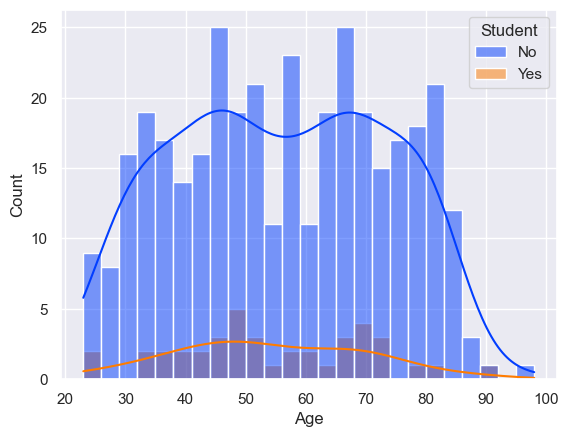

In [26]:
#Age Distribution between Student and Non-Students
sns.histplot(data = df, x = 'Age', bins = 25, kde = True, hue = 'Student', palette = 'bright')
plt.show()

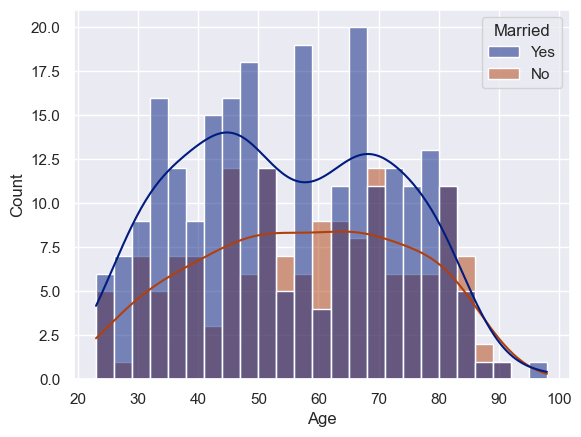

In [27]:
# Age dist between married and unmarried
sns.histplot(data = df, x = 'Age', bins = 25, kde = True, hue = 'Married', palette = 'dark')
plt.show()

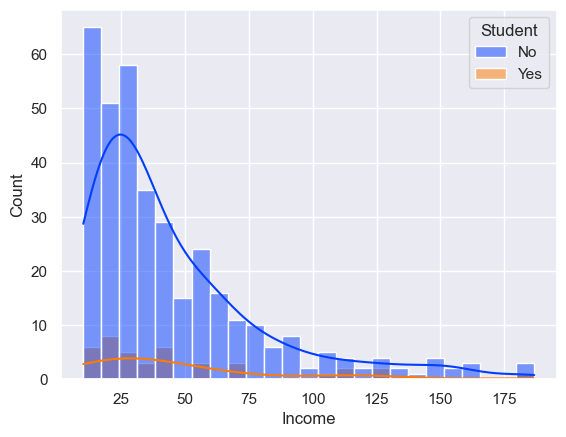

In [28]:
#Income Distribution between Student and Non-Students
sns.histplot(data = df, x = 'Income', bins = 25, kde = True, hue = 'Student', palette = 'bright')
plt.show()

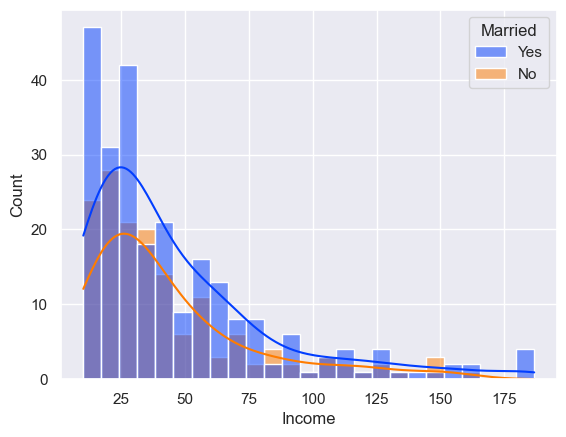

In [29]:
#Income Distribution between Married and Un-married
sns.histplot(data = df, x = 'Income', bins = 25, kde = True, hue = 'Married', palette = 'bright')
plt.show()

In [30]:
df['Region'].value_counts()

Region
South    199
West     102
East      99
Name: count, dtype: int64

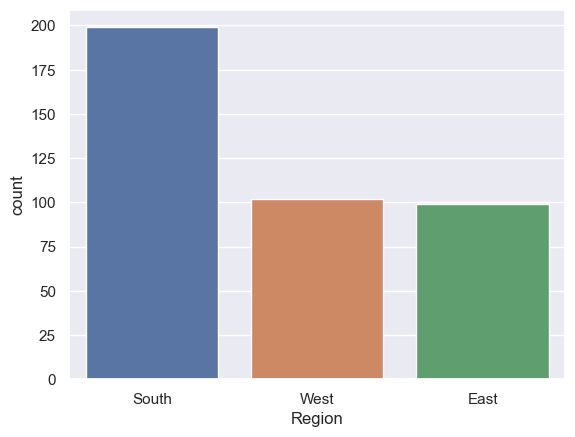

In [32]:
#region wise Count
sns.countplot(x = 'Region', data =df, hue = 'Region')
plt.show()

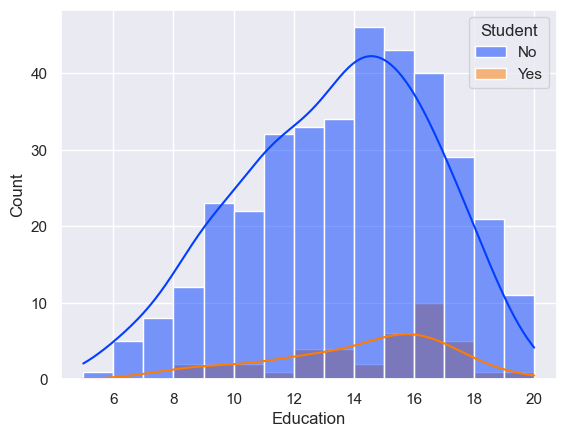

In [50]:
#Education Distribution between Student and Non-Students
sns.histplot(data = df, x = 'Education', bins = 15, kde = True, hue = 'Student', palette = 'bright')
plt.show()

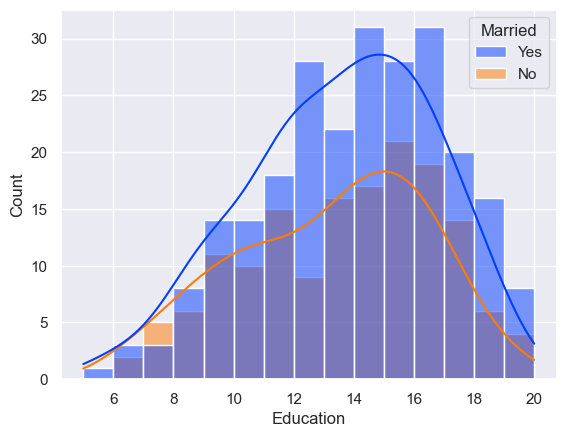

In [48]:
#Education Distribution between Married and Un-married
sns.histplot(data = df, x = 'Education', bins = 15, kde = True, hue = 'Married', palette = 'bright')
plt.show()

In [37]:
#Region wise Total Income

df1 = df.groupby('Region')['Income'].sum()
df1

Region
East     4720.528
South    8859.867
West     4507.159
Name: Income, dtype: float64

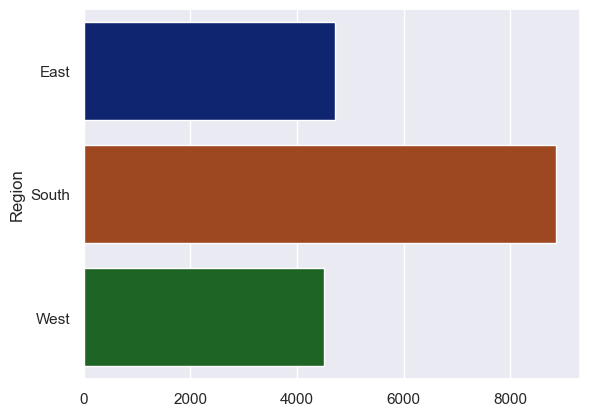

In [45]:
sns.barplot(x = df1.values, y = df1.index, palette = 'dark')
plt.show()

In [54]:
#Region wise Cards ownership distribution

df2 = df.groupby(['Region','Own'])['Cards'].sum().reset_index()
df2

,Region,Own,Cards
0,East,No,140
1,East,Yes,153
2,South,No,282
3,South,Yes,305
4,West,No,155
5,West,Yes,148


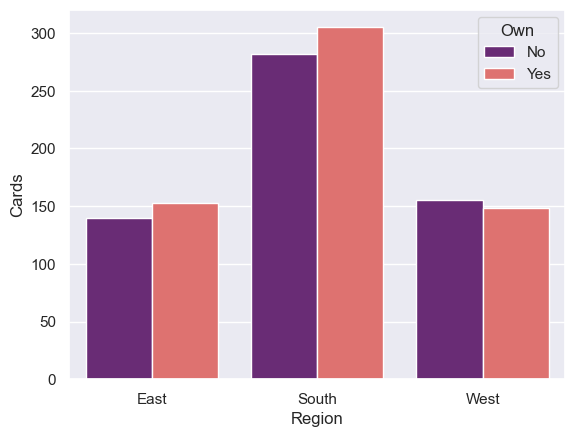

In [63]:
sns.barplot(x = 'Region', y = 'Cards', data = df2, ci = None, hue = 'Own', palette = 'magma')
plt.show()

### Q1. Sample mean income ?

In [65]:
df['Income'].mean()

45.218885

### Q2. the first, second and third quartiles of income.

In [67]:
quantiles = df['Income'].quantile([0.25, 0.5, 0.75])
print("\nQuantiles of income:")
print(quantiles)


Quantiles of income:
0.25    21.00725
0.50    33.11550
0.75    57.47075
Name: Income, dtype: float64


### What is sample standard deviation of income? What is the IQR of income?

In [70]:
# the sample standard deviation of Income
std_income = df['Income'].std()
print(f"Sample Standard Deviation of Annual Salary: {std_income}")

# Calculate the IQR of income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) of Income: {IQR}")

Sample Standard Deviation of Annual Salary: 35.24427316507052
Interquartile Range (IQR) of Income: 36.4635


So, as wecan see STD and IQR are not vastly different

### Construct a boxplot of the Balance variable.

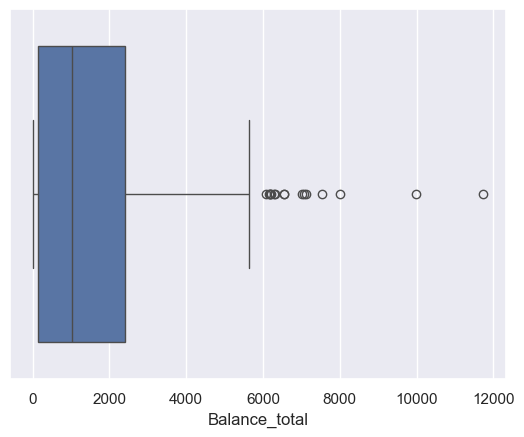

In [72]:
sns.boxplot(x = 'Balance_total', data= df)
plt.show()

### Suppose that having 1, 2, or 3 credit cards is classified as having a "low" number of credit
cards. Having more than 3 credit cards is classified as having "high" number of credit cards.
We are interested in understanding distribution of credit card ownership across different
regions. Create a contingency table of "high"/"low" credit card ownership against region.

In [73]:
# Define a function to classify credit card ownership
def classify_credit_cards(num_cards):
    if num_cards <= 3:
        return 'Low'
    else:
        return 'High'

# Apply the classification function to create a new column 'CreditCardOwnership'
df['CreditCardOwnership'] = df['Cards'].apply(classify_credit_cards)

# contingency table of 'CreditCardOwnership' against 'Region'
contingency_table = pd.crosstab(df['CreditCardOwnership'], df['Region'])

print("Contingency Table of Credit Card Ownership against Region:")
print(contingency_table)

Contingency Table of Credit Card Ownership against Region:
Region               East  South  West
CreditCardOwnership                   
High                   25     66    32
Low                    74    133    70


In [75]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance_avg,Balance_total,CreditCardOwnership
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,666,Low
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,2709,Low
2,104.593,7075,514,4,71,11,No,No,No,West,580,2320,High
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,2892,Low
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,662,Low


### 8. What is the probability of an individual holding high number of credit cards?

In [78]:
high_count = df[df['CreditCardOwnership'] == 'High'].shape[0]
total_count = df.shape[0]

probability_high = high_count / total_count

print(f"Probability of an individual holding a high number of credit cards:", probability_high)

Probability of an individual holding a high number of credit cards: 0.3075


### 9. Whats the Probability that the individual comes from the South region?

In [80]:
south_count = df[df['Region']=='South'].shape[0]

In [82]:
probability_south = south_count/ total_count

In [83]:
print('Probability of an individual coming from South is :', probability_south)

Probability of an individual coming from South is : 0.4975


### 10. What is the probabiity that an individual is from the eastern region and holds a low number of credit cards?

In [89]:
df3  =  df[(df['Region']=='East')&(df['CreditCardOwnership']=='Low')]

In [93]:
EastLow_count = df3.shape[0]

In [91]:
df3.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance_avg,Balance_total,CreditCardOwnership
6,20.996,3388,259,2,37,12,Yes,No,No,East,203,406,Low
9,71.061,6819,491,3,41,19,Yes,Yes,Yes,East,1350,4050,Low
14,19.144,3291,269,2,75,13,Yes,No,No,East,148,296,Low
15,20.089,2525,200,3,57,15,Yes,No,Yes,East,0,0,Low
16,53.598,3714,286,3,73,17,Yes,No,Yes,East,0,0,Low


In [96]:
Probability =  EastLow_count / total_count

In [97]:
print('Probability of an individual coming from east and holds low no of Credit cards :', Probability)

Probability of an individual coming from east and holds low no of Credit cards : 0.185
